# Marketing Campaign- Customer Segmentation Case Study
<b>Introduction</b>: Marketing Campaigns are a vital part of how company's promote their interests, whether that be raising awareness for a new product or capturing customer feedback. That's why it's important for the data analysts of any company to be able to gauge customer's participation in the marketing campaigns, assess the success of past campaigns, and propose data-driven solutions to increase participation in future campaigns.

<b>Customer Segmentation:</b>

Customer Segmentation creates information that supports decision-making by matching the right customers with the right services and products. It also makes it possible to take the right actions to address customers' concerns.

A response model can provide a significant boost to the efficiency of a marketing campaign by increasing responses or reducing expenses. In this case study, we will understand the Target Customers for the marketing team to plan strategy and also the task is to predict who will respond to an offer for a product or service based on customer pattern. 

# Reading the data into python
This is one of the most important steps in machine learning! You must understand the data and the domain well before trying to apply any machine learning algorithm.

The data has one file "marketing_data.csv". This file contains 2240 marketing data.

Dataset Link: https://www.mavenanalytics.io/data-playground?search=marketing

### Data desciption
The business meaning of each column in the data is as below

* <b>ID</b>:	Customer's unique identifier
* <b>Year_Birth</b>:	Customer's birth year
* <b>Education</b>:	Customer's education level
* <b>Marital_Status</b>:	Customer's marital status
* <b>Income</b></b>: 	Customer's yearly household income
* <b>Kidhome</b>:	Number of children in customer's household
* <b>Teenhome</b>:	Number of teenagers in customer's household
* <b>Dt_Customer</b>:	Date of customer's enrollment with the company
* <b>Recency</b>:	Number of days since customer's last purchase
* <b>MntWines</b>:	Amount spent on wine in the last 2 years
* <b>MntFruits</b>:	Amount spent on fruits in the last 2 years
* <b>MntMeatProducts</b>:	Amount spent on meat in the last 2 years
* <b>MntFishProducts</b>:	Amount spent on fish in the last 2 years
* <b>MntSweetProducts</b>:	Amount spent on sweets in the last 2 years
* <b>MntGoldProds</b>:	Amount spent on gold in the last 2 years
* <b>NumDealsPurchases</b>:	Number of purchases made with a discount
* <b>NumWebPurchases</b>:	Number of purchases made through the company's web site
* <b>NumCatalogPurchases</b>:	Number of purchases made using a catalogue
* <b>NumStorePurchases</b>:	Number of purchases made directly in stores
* <b>NumWebVisitsMonth</b>:	Number of visits to company's web site in the last month
* <b>AcceptedCmp3</b>:	1 if customer accepted the offer in the 3rd campaign, 0 otherwise
* <b>AcceptedCmp4</b>:	1 if customer accepted the offer in the 4th campaign, 0 otherwise
* <b>AcceptedCmp5</b>:	1 if customer accepted the offer in the 5th campaign, 0 otherwise
* <b>AcceptedCmp1</b>:	1 if customer accepted the offer in the 1st campaign, 0 otherwise
* <b>AcceptedCmp2</b>:	1 if customer accepted the offer in the 2nd campaign, 0 otherwise
* <b>Response</b>:	1 if customer accepted the offer in the last campaign, 0 otherwise
* <b>Complain</b>:	1 if customer complained in the last 2 years, 0 otherwise
* <b>Country</b>:	Customer's location


In [119]:
# Supressing the warning messages
import warnings
warnings.filterwarnings('ignore')

In [120]:
# Reading the dataset
import pandas as pd
import numpy as np
MarketingData=pd.read_csv('marketingdatacsv.csv', encoding='latin')
print('Shape before deleting duplicate values:', MarketingData.shape)

# Removing duplicate rows if any
MarketingData=MarketingData.drop_duplicates()
print('Shape After deleting duplicate values:', MarketingData.shape)

# Printing sample data
# Start observing the Quantitative/Categorical/Qualitative variables
MarketingData.head(10)

Shape before deleting duplicate values: (2240, 28)
Shape After deleting duplicate values: (2240, 28)


,ï»¿ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,84835.0,0,0,16-06-2014,0,189,...,6,1,0,0,0,0,0,1,0,Spain
1,1,1961,Graduation,Single,57091.0,0,0,15-06-2014,0,464,...,7,5,0,0,0,0,1,1,0,Canada
2,10476,1958,Graduation,Married,67267.0,0,1,13-05-2014,0,134,...,5,2,0,0,0,0,0,0,0,USA
3,1386,1967,Graduation,Together,32474.0,1,1,11-05-2014,0,10,...,2,7,0,0,0,0,0,0,0,Australia
4,5371,1989,Graduation,Single,21474.0,1,0,08-04-2014,0,6,...,2,7,1,0,0,0,0,1,0,Spain
5,7348,1958,PhD,Single,71691.0,0,0,17-03-2014,0,336,...,5,2,0,0,0,0,0,1,0,Spain
6,4073,1954,2n Cycle,Married,63564.0,0,0,29-01-2014,0,769,...,7,6,1,0,0,0,0,1,0,Germany
7,1991,1967,Graduation,Together,44931.0,0,1,18-01-2014,0,78,...,3,5,0,0,0,0,0,0,0,Spain
8,4047,1954,PhD,Married,65324.0,0,1,11-01-2014,0,384,...,9,4,0,0,0,0,0,0,0,USA
9,9477,1954,PhD,Married,65324.0,0,1,11-01-2014,0,384,...,9,4,0,0,0,0,0,0,0,India


In [121]:
MarketingData.columns[0]

'ï»¿ID'

In [122]:
#changing 1st column name
MarketingData.rename(columns={MarketingData.columns[0]: 'ID'}, inplace=True)

In [123]:
MarketingData.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')

# Defining the problem statement:

1) Create customer segmentation using clustering algo to determine different group of customers for prediction.

2) Create a ML model which predict responses based on customer profiles, product preferences, campaign successes/failures, and channel performance. 

* Target Variable: Response
* Predictors: Education, Income, MntMeatProducts etc.

# Determining the type of Machine Learning
Based on the problem statement you can understand that we need to create a supervised ML classification model, as the target variable is Categorical.

# Looking at the distribution of Target variable

<AxesSubplot:xlabel='Response'>

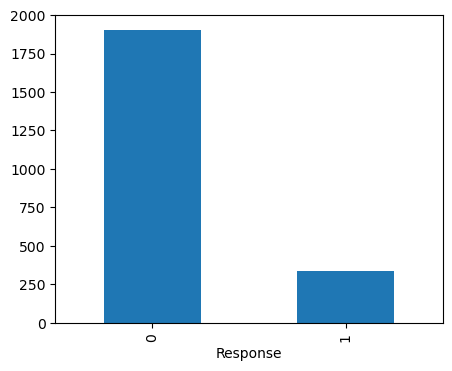

In [124]:
%matplotlib inline
#Creating Bar chart as the Target variable is Categorical
GroupedData=MarketingData.groupby('Response').size()
GroupedData.plot(kind='bar',figsize=(5,4))

The data distribution of the target variable is satisfactory to proceed further. There are sufficient number of rows for each category to learn from.

# Basic Data Exploration

In [125]:
# Looking at sample rows in the data
MarketingData.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,84835.0,0,0,16-06-2014,0,189,...,6,1,0,0,0,0,0,1,0,Spain
1,1,1961,Graduation,Single,57091.0,0,0,15-06-2014,0,464,...,7,5,0,0,0,0,1,1,0,Canada
2,10476,1958,Graduation,Married,67267.0,0,1,13-05-2014,0,134,...,5,2,0,0,0,0,0,0,0,USA
3,1386,1967,Graduation,Together,32474.0,1,1,11-05-2014,0,10,...,2,7,0,0,0,0,0,0,0,Australia
4,5371,1989,Graduation,Single,21474.0,1,0,08-04-2014,0,6,...,2,7,1,0,0,0,0,1,0,Spain


In [126]:
# Observing the summarized information of data
# Data types, Missing values based on number of non-null values Vs total rows etc.
# Remove those variables from data which have too many missing values (Missing Values > 30%)
# Remove Qualitative variables which cannot be used in Machine Learning
MarketingData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [127]:
# Looking at the descriptive statistics of the data
MarketingData.describe(include='all')

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
count,2240.000000,2240.000000,2240,2240,2216.000000,2240.000000,2240.000000,2240,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240
unique,NaN,NaN,5,8,NaN,NaN,NaN,663,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8
top,NaN,NaN,Graduation,Married,NaN,NaN,NaN,31-08-2012,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spain
freq,NaN,NaN,1127,864,NaN,NaN,NaN,12,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1095
mean,5592.159821,1968.805804,NaN,NaN,52247.251354,0.444196,0.506250,NaN,49.109375,303.935714,...,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.149107,0.009375,NaN
std,3246.662198,11.984069,NaN,NaN,25173.076661,0.538398,0.544538,NaN,28.962453,336.597393,...,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.356274,0.096391,NaN
min,0.000000,1893.000000,NaN,NaN,1730.000000,0.000000,0.000000,NaN,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,2828.250000,1959.000000,NaN,NaN,35303.000000,0.000000,0.000000,NaN,24.000000,23.750000,...,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,5458.500000,1970.000000,NaN,NaN,51381.500000,0.000000,0.000000,NaN,49.000000,173.500000,...,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
75%,8427.750000,1977.000000,NaN,NaN,68522.000000,1.000000,1.000000,NaN,74.000000,504.250000,...,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN


In [128]:
# Finging unique values for each column
# TO understand which column is categorical and which one is Continuous
# Typically if the numer of unique values are < 20 then the variable is likely to be a category otherwise continuous
MarketingData.nunique()

ID                     2240
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1974
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Response                  2
Complain                  2
Country                   8
dtype: int64

#### Basic Data Exploration Results
Based on the basic exploration above, you can now create a simple report of the data, noting down your observations regaring each column. Hence, creating a initial roadmap for further analysis.

The selected columns in this step are not final, further study will be done and then a final list will be created.
* ID: Qualitative. Not Selected.
* Year_Birth : Continuous. Rejected. A new feature can be engineered from it.
* Education: Categorical. Selected.
* Marital_Status: Categorical. Selected.
* Income : Continuous. Selected. 
* Kidhome : Categorical. Selected.
* Teenhome: Categorical. Selected.
* Dt_Customer: Continuous. Rejected. A new feature can be engineered from it.
* Recency: Continuous. Rejected. A new feature can be engineered from it.
* MntWines : Continuous. Selected. 
* MntFruits: Continuous. Selected. 
* MntMeatProducts: Continuous. Selected. 
* MntFishProducts: Continuous. Selected. 
* MntSweetProducts: Continuous. Selected. 
* MntGoldProds: Continuous. Selected. 
* NumDealsPurchases: Continuous. Selected. 
* NumWebPurchases : Continuous. Selected. 
* NumCatalogPurchases: Continuous. Selected. 
* NumStorePurchases: Continuous. Selected. 
* NumWebVisitsMonth: Continuous. Selected. 
* AcceptedCmp3: Categorical. Selected.
* AcceptedCmp4: Categorical. Selected.
* AcceptedCmp5: Categorical. Selected.
* AcceptedCmp1: Categorical. Selected.
* AcceptedCmp2: Categorical. Selected.
* Response: Categorical. Selected. This is the Target Variable!
* Complain: Qualitative. Not Selected.
* Country : Categorical. Selected.    

# Feature Engineering

#### Feature engineering on 'Year_Birth' to get 'age' column 

In [129]:
type(MarketingData['Year_Birth'][0])
MarketingData['Year_Birth']

0       1970
1       1961
2       1958
3       1967
4       1989
        ... 
2235    1976
2236    1977
2237    1976
2238    1978
2239    1969
Name: Year_Birth, Length: 2240, dtype: int64

In [130]:
# from datetime import date
# today= date.today()
# MarketingData[age]=today.year-10-MarketingData['Year_Birth']
MarketingData['age']=(2000-MarketingData['Year_Birth'])
MarketingData.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,age
0,1826,1970,Graduation,Divorced,84835.0,0,0,16-06-2014,0,189,...,1,0,0,0,0,0,1,0,Spain,30
1,1,1961,Graduation,Single,57091.0,0,0,15-06-2014,0,464,...,5,0,0,0,0,1,1,0,Canada,39
2,10476,1958,Graduation,Married,67267.0,0,1,13-05-2014,0,134,...,2,0,0,0,0,0,0,0,USA,42
3,1386,1967,Graduation,Together,32474.0,1,1,11-05-2014,0,10,...,7,0,0,0,0,0,0,0,Australia,33
4,5371,1989,Graduation,Single,21474.0,1,0,08-04-2014,0,6,...,7,1,0,0,0,0,1,0,Spain,11


In [131]:
MarketingData['age'].max()

107

#### Feature engineering on 'Dt_Customer' column

In [132]:
type(MarketingData['Dt_Customer'][0])

str

In [133]:
MarketingData['Dt_Customer']

0       16-06-2014
1       15-06-2014
2       13-05-2014
3       11-05-2014
4       08-04-2014
           ...    
2235    07-03-2013
2236    22-01-2013
2237    03-12-2012
2238    29-11-2012
2239    01-09-2012
Name: Dt_Customer, Length: 2240, dtype: object

In [134]:
# converting str column to datetime
MarketingData['Dt_Customer']=pd.to_datetime(MarketingData['Dt_Customer'],format = '%d-%m-%Y')
MarketingData['Dt_Customer']

0      2014-06-16
1      2014-06-15
2      2014-05-13
3      2014-05-11
4      2014-04-08
          ...    
2235   2013-03-07
2236   2013-01-22
2237   2012-12-03
2238   2012-11-29
2239   2012-09-01
Name: Dt_Customer, Length: 2240, dtype: datetime64[ns]

In [135]:
type(MarketingData['Dt_Customer'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [136]:
MarketingData['Yr_Customer']=MarketingData['Dt_Customer'].dt.year

#### Creating new column for total_spent

In [137]:
MarketingData['total_spent'] = MarketingData["MntWines"]+ MarketingData["MntFruits"]
+MarketingData["MntMeatProducts"]+ MarketingData["MntFishProducts"]
+MarketingData["MntSweetProducts"]+ MarketingData["MntGoldProds"]

0       407
1        37
2        32
3         0
4        34
       ... 
2235    126
2236     24
2237     19
2238    228
2239    144
Length: 2240, dtype: int64

In [138]:
MarketingData.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,age,Yr_Customer,total_spent
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,...,0,0,0,0,1,0,Spain,30,2014,293
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,0,0,0,1,1,0,Canada,39,2014,469
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,...,0,0,0,0,0,0,USA,42,2014,145
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,...,0,0,0,0,0,0,Australia,33,2014,10
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,...,0,0,0,0,1,0,Spain,11,2014,22


# Removing useless columns from the data

In [139]:
# Deleting those columns which are not useful in predictive analysis because these variables are qualitative
UselessColumns = ['ID', 'Year_Birth','Dt_Customer']
MarketingData = MarketingData.drop(UselessColumns,axis=1)
MarketingData.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,age,Yr_Customer,total_spent
0,Graduation,Divorced,84835.0,0,0,0,189,104,379,111,...,0,0,0,0,1,0,Spain,30,2014,293
1,Graduation,Single,57091.0,0,0,0,464,5,64,7,...,0,0,0,1,1,0,Canada,39,2014,469
2,Graduation,Married,67267.0,0,1,0,134,11,59,15,...,0,0,0,0,0,0,USA,42,2014,145
3,Graduation,Together,32474.0,1,1,0,10,0,1,0,...,0,0,0,0,0,0,Australia,33,2014,10
4,Graduation,Single,21474.0,1,0,0,6,16,24,11,...,0,0,0,0,1,0,Spain,11,2014,22


In [140]:
MarketingData.columns

Index(['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Response', 'Complain', 'Country', 'age', 'Yr_Customer', 'total_spent'],
      dtype='object')

# Visual Exploratory Data Analysis
* Categorical variables: Bar plot
* Continuous variables: Histogram

#### Visualize distribution of all the Categorical Predictor variables in the data using bar plots

* <b>Categorical Predictors</b>: 'Education', 'Marital_Status', 'Kidhome', 'Teenhome','AcceptedCmp3','AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2','Complain', 'Country', 'Yr_Customer'


In [141]:
# Plotting multiple bar charts at once for categorical variables
# Since there is no default function which can plot bar charts for multiple columns at once
# we are defining our own function for the same

def PlotBarCharts(inpData, colsToPlot):
    %matplotlib inline
    
    import matplotlib.pyplot as plt
    
    # Generating multiple subplots
    fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(20,5))
    fig.suptitle('Bar charts of: '+ str(colsToPlot))

    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        inpData.groupby(colName).size().plot(kind='bar',ax=subPlot[plotNumber])

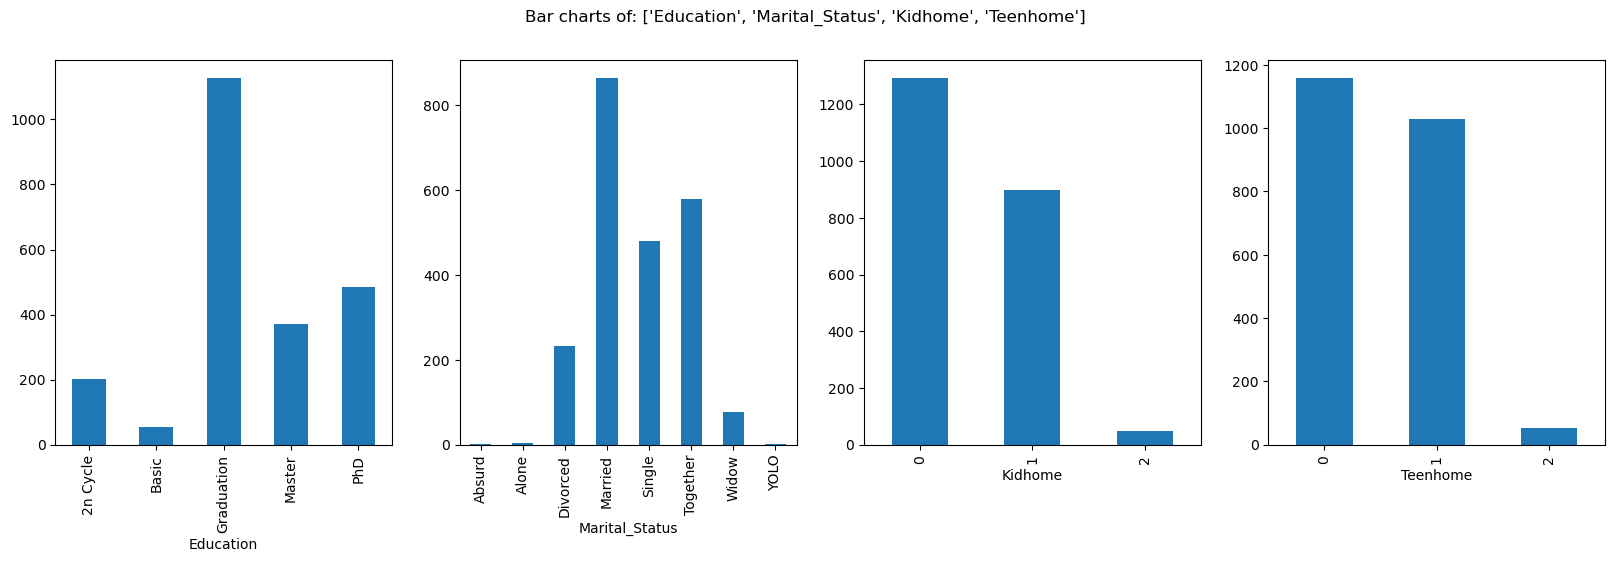

In [142]:
# Calling the function
PlotBarCharts(inpData=MarketingData, colsToPlot=['Education','Marital_Status','Kidhome','Teenhome'])

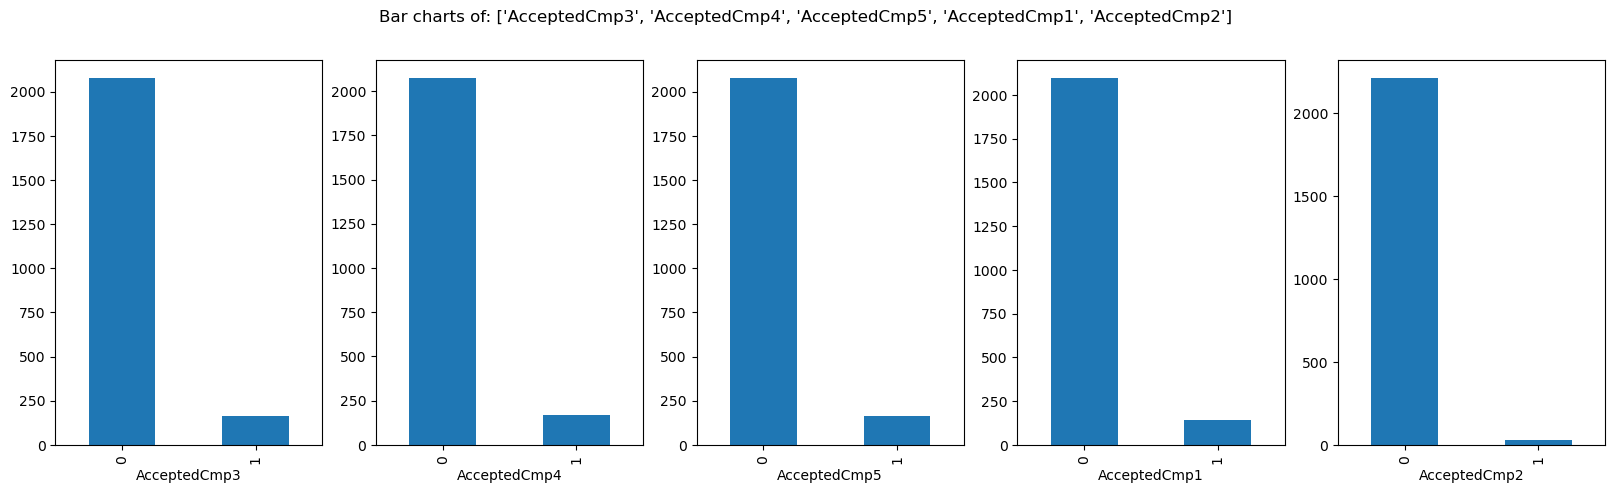

In [143]:
# Calling the function
PlotBarCharts(inpData=MarketingData, colsToPlot=['AcceptedCmp3','AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2'])

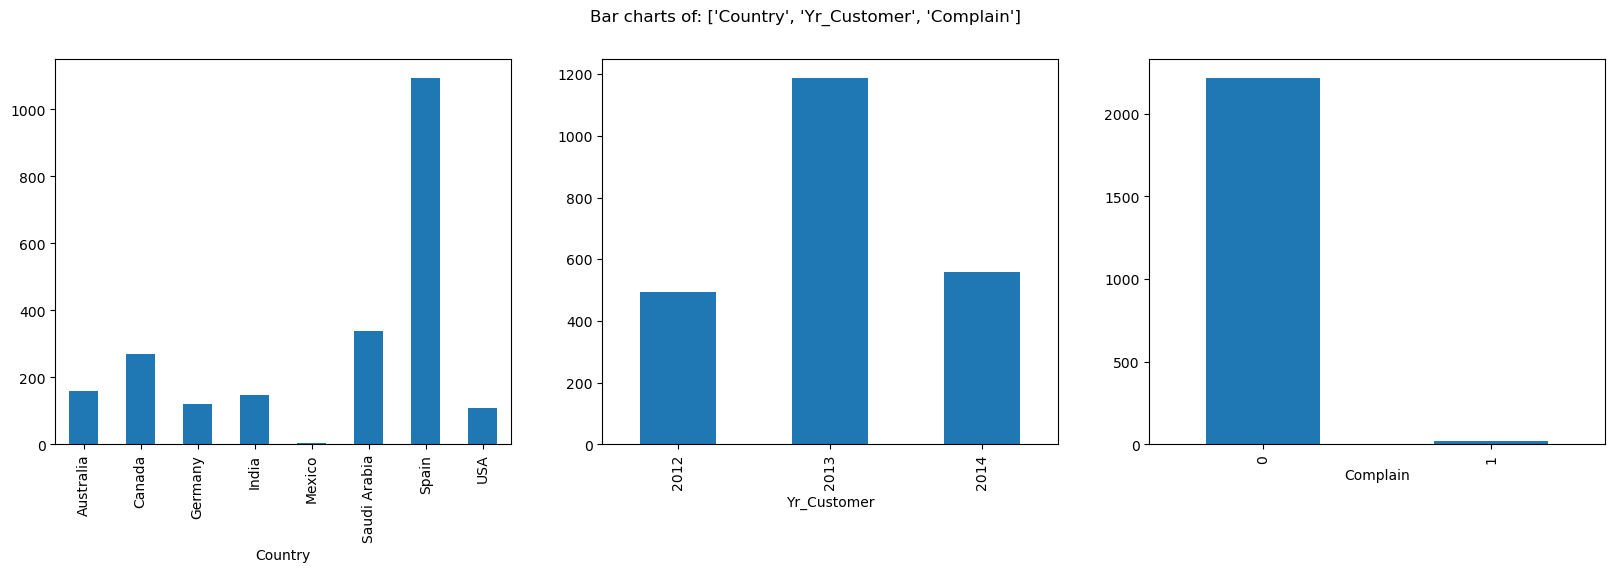

In [144]:
# Calling the function
PlotBarCharts(inpData=MarketingData, colsToPlot=['Country', 'Yr_Customer','Complain'])


#### Bar Charts Interpretation

#### Visualize distribution of all the Continuous Predictor variables in the data using histograms
Based on the Basic Data Exploration, fifteen continuous predictor variables.

* <b>Continuous Predictors</b>:
'Income','Recency', 'MntWines', 'MntFruits', 'MntMeatProducts','MntFishProducts', 'MntSweetProducts', 'MntGoldProds',     'NumDealsPurchases', 'NumCatalogPurchases','NumStorePurchases', 'NumWebVisitsMonth', 'age', 'total_spent'

array([[<AxesSubplot:title={'center':'MntWines'}>,
        <AxesSubplot:title={'center':'MntFruits'}>,
        <AxesSubplot:title={'center':'MntMeatProducts'}>],
       [<AxesSubplot:title={'center':'MntFishProducts'}>,
        <AxesSubplot:title={'center':'MntSweetProducts'}>,
        <AxesSubplot:title={'center':'MntGoldProds'}>],
       [<AxesSubplot:title={'center':'total_spent'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

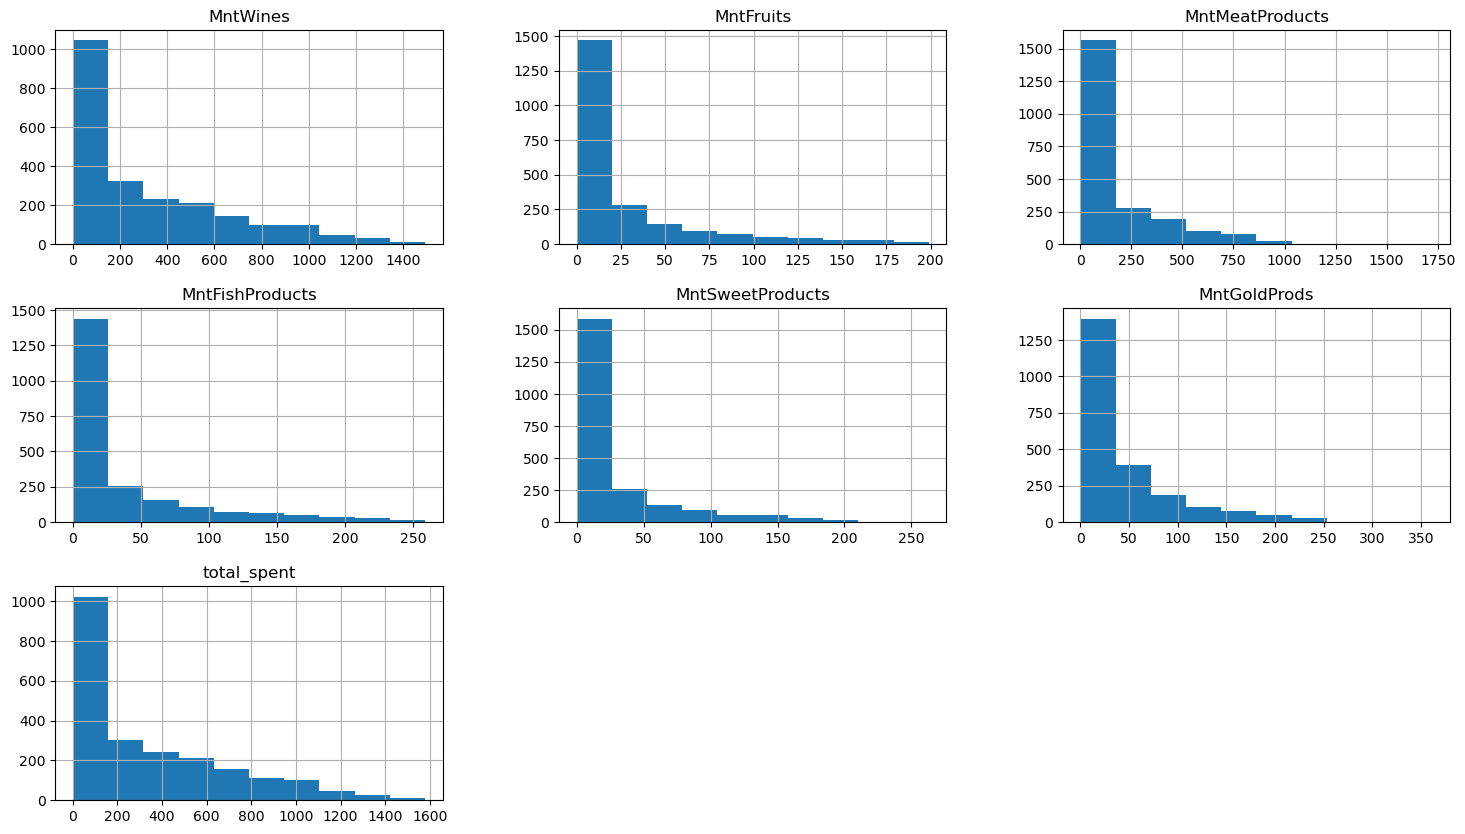

In [145]:
# Plotting histograms of multiple columns together
MarketingData.hist([ 'MntWines', 'MntFruits', 'MntMeatProducts','MntFishProducts', 'MntSweetProducts', 'MntGoldProds','total_spent'], figsize=(18,10))

array([[<AxesSubplot:title={'center':'Income'}>,
        <AxesSubplot:title={'center':'Recency'}>],
       [<AxesSubplot:title={'center':'age'}>, <AxesSubplot:>]],
      dtype=object)

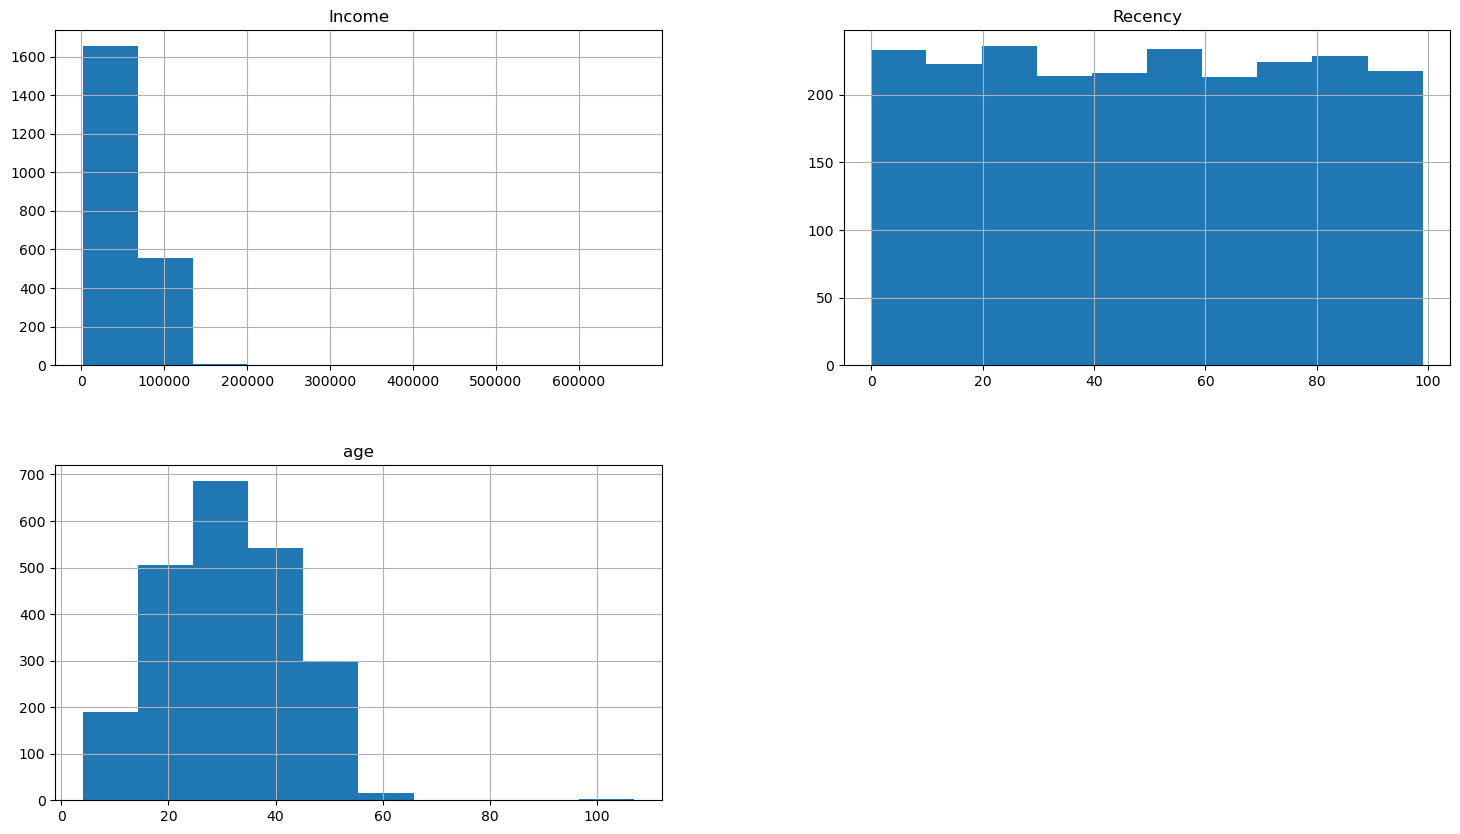

In [146]:
MarketingData.hist(['Income','Recency', 'age'], figsize=(18,10))

array([[<AxesSubplot:title={'center':'NumDealsPurchases'}>,
        <AxesSubplot:title={'center':'NumWebPurchases'}>],
       [<AxesSubplot:title={'center':'NumCatalogPurchases'}>,
        <AxesSubplot:title={'center':'NumStorePurchases'}>],
       [<AxesSubplot:title={'center':'NumWebVisitsMonth'}>,
        <AxesSubplot:>]], dtype=object)

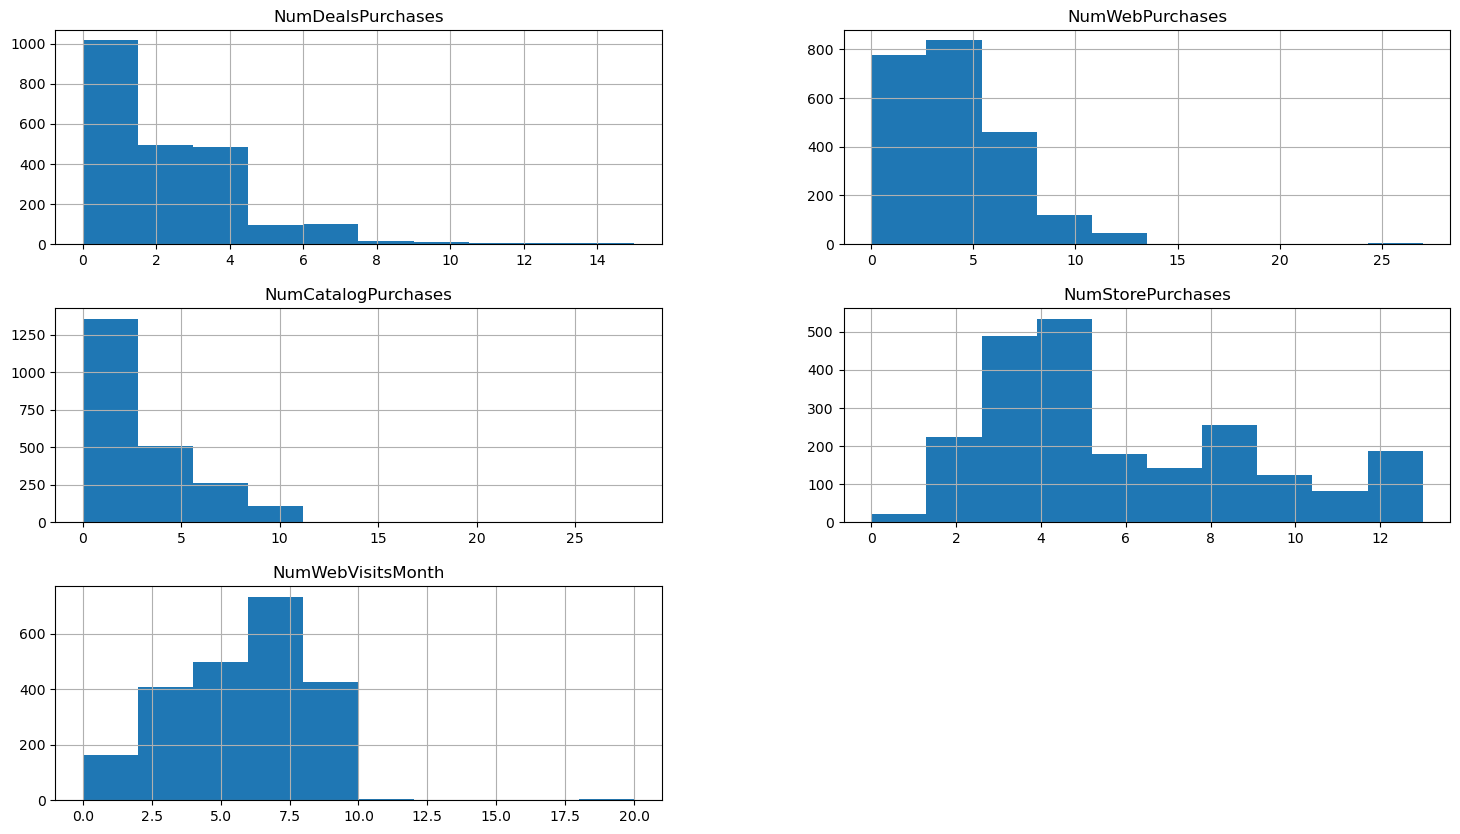

In [147]:
MarketingData.hist(['NumDealsPurchases', 'NumWebPurchases','NumCatalogPurchases','NumStorePurchases', 'NumWebVisitsMonth'], figsize=(18,10))

#### Histogram Interpretation

# Outlier treatment

#### Replacing outliers for 'Income'

In [148]:
# Finding nearest values to 200000 mark
MarketingData['Income'][MarketingData['Income']<200000].sort_values(ascending=False)

731     162397.0
497     160803.0
853     157733.0
2204    157243.0
325     157146.0
          ...   
14        4428.0
663       4023.0
1291      3502.0
961       2447.0
1466      1730.0
Name: Income, Length: 2215, dtype: float64

Above result shows the nearest logical value is 162397, hence, replacing any value above 200000 with it.

In [149]:
# Replacing outliers with nearest possibe value
MarketingData['Income'][MarketingData['Income']>200000] =162397

#### Replacing outliers for 'Age'

In [150]:
# Finding nearest values to 70 mark
MarketingData['age'][MarketingData['age']<70].sort_values(ascending=False)

2171    60
1740    59
1693    57
1208    57
1475    57
        ..
697      5
1298     5
1467     5
562      4
1824     4
Name: age, Length: 2237, dtype: int64

In [151]:
# Replacing outliers with nearest possibe value
MarketingData['age'][MarketingData['age']>70] =60

#### Visualizing distribution after outlier treatment

array([[<AxesSubplot:title={'center':'Income'}>,
        <AxesSubplot:title={'center':'Recency'}>],
       [<AxesSubplot:title={'center':'age'}>, <AxesSubplot:>]],
      dtype=object)

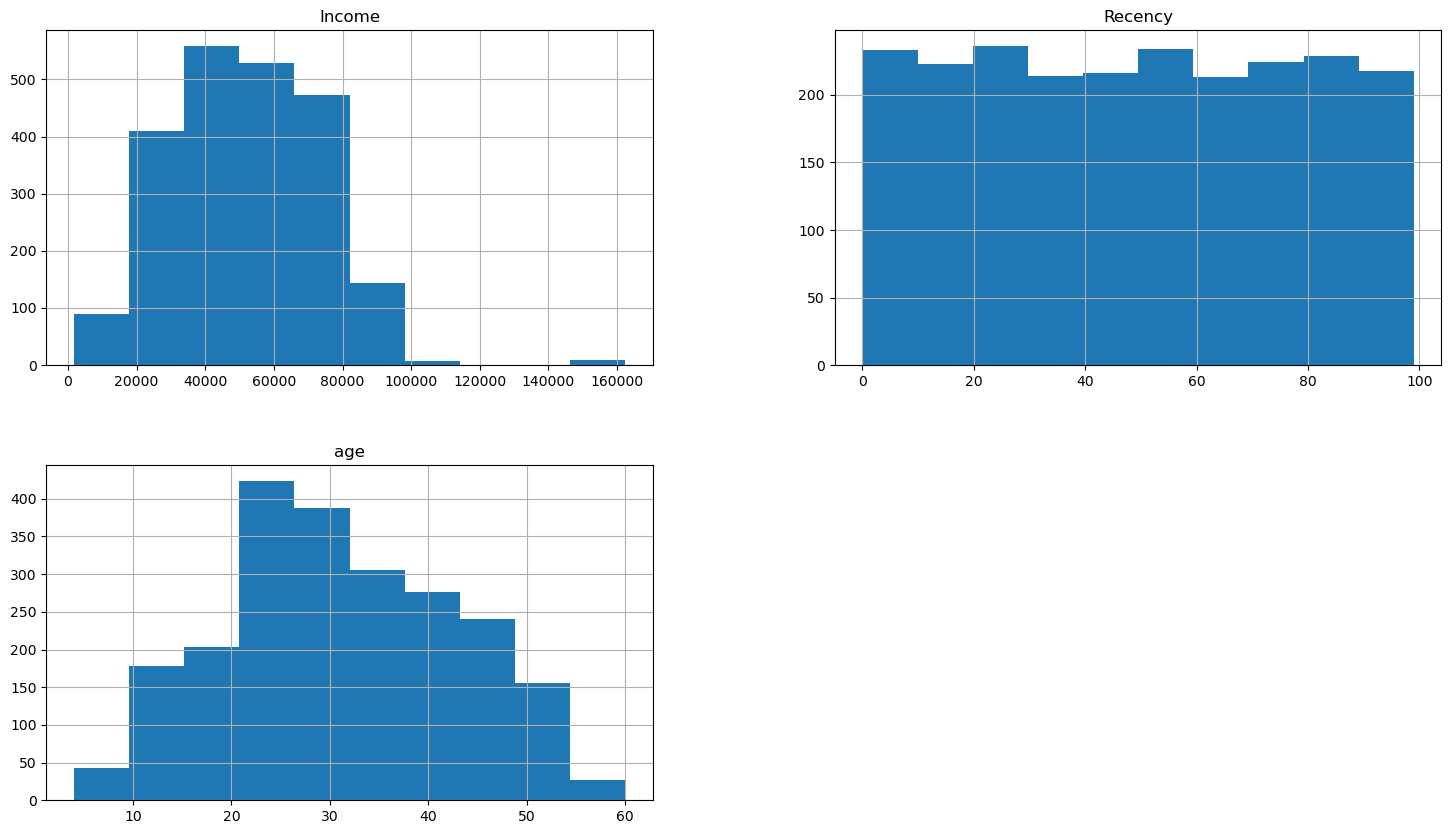

In [152]:
MarketingData.hist(['Income','Recency', 'age'], figsize=(18,10))

# Missing values treatment

In [153]:
# Finding how many missing values are there for each column
MarketingData.isnull().sum()

Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
age                     0
Yr_Customer             0
total_spent             0
dtype: int64

In [154]:
#Check the rows where data is missing
IncomeMissing=MarketingData['Income'].isnull()

In [155]:
MarketingData[IncomeMissing].head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,age,Yr_Customer,total_spent
134,PhD,Married,NaN,2,1,4,230,42,192,49,...,0,0,0,0,0,0,Germany,43,2012,272
262,Graduation,Married,NaN,1,0,11,5,5,6,0,...,0,0,0,0,0,0,USA,17,2013,10
394,PhD,Together,NaN,1,0,17,25,1,13,0,...,0,0,0,0,0,0,Australia,28,2014,26
449,Graduation,Single,NaN,1,0,19,5,1,3,3,...,0,0,0,0,0,0,Australia,14,2013,6
525,PhD,Married,NaN,0,1,23,352,0,27,10,...,0,0,0,0,0,0,Canada,39,2013,352


##### I am treating missing values of Income with Median as it has Continuous values

In [156]:
MarketingData['Income'].median()

51381.5

In [157]:
# Treating missing values of continuous variable with Median value
MarketingData['Income'].fillna(value=MarketingData['Income'].median(), inplace=True)

In [158]:
MarketingData.isnull().sum()

Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Response               0
Complain               0
Country                0
age                    0
Yr_Customer            0
total_spent            0
dtype: int64

## 11. Feature Selection

### Relationship exploration: Categorical Vs Continuous -- Box Plots
When the target variable is Categorical and the predictor variable is Continuous we analyze the relation using bar plots/Boxplots and measure the strength of relation using Anova test

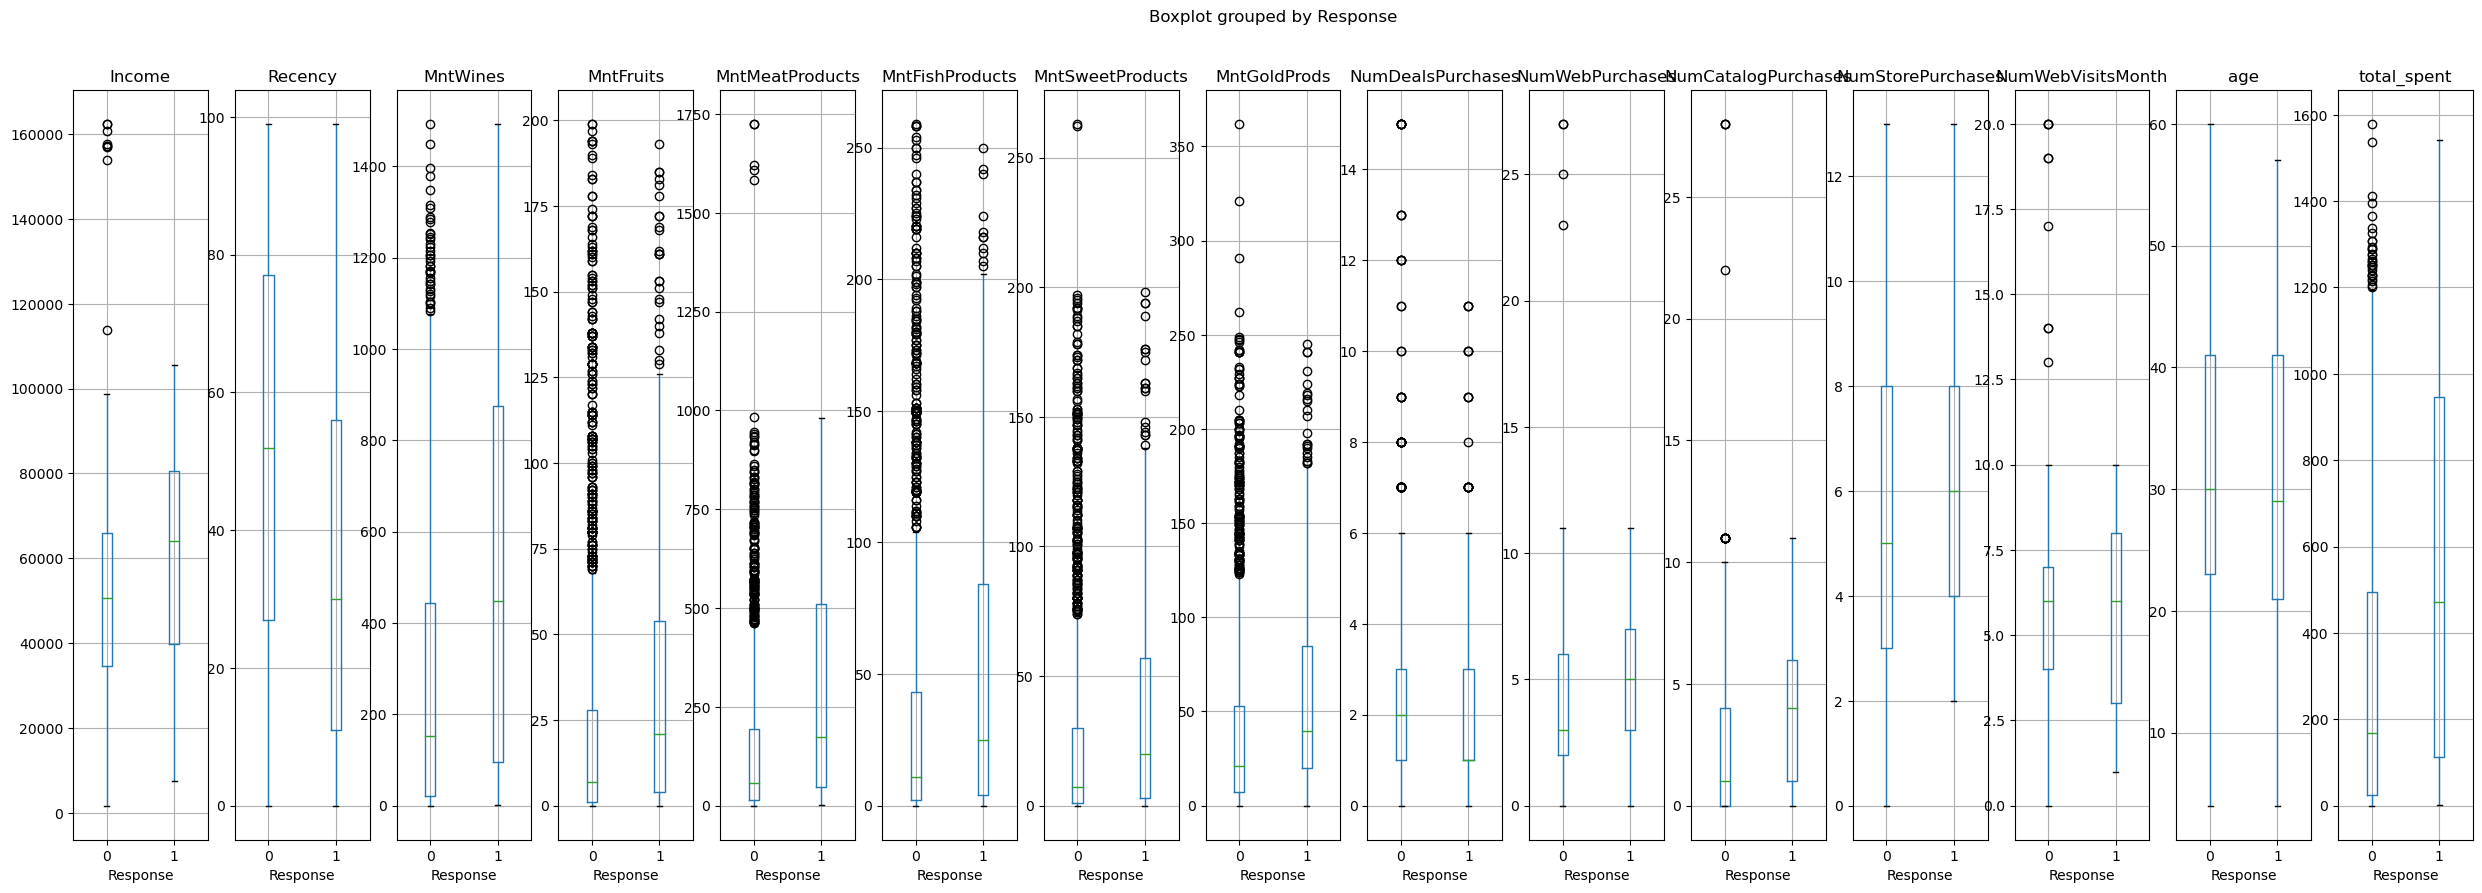

In [159]:
# Box plots for Categorical Target Variable "Survived" and continuous predictors
ContinuousColsList=['Income','Recency', 'MntWines', 'MntFruits', 'MntMeatProducts','MntFishProducts',
                'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases','NumCatalogPurchases',
                'NumStorePurchases', 'NumWebVisitsMonth', 'age','total_spent']

import matplotlib.pyplot as plt
fig, PlotCanvas=plt.subplots(nrows=1, ncols=len(ContinuousColsList), figsize=(30,10))

# Creating box plots for each continuous predictor against the Target Variable "Survived"
for PredictorCol , i in zip(ContinuousColsList, range(len(ContinuousColsList))):
    MarketingData.boxplot(column=PredictorCol, by='Response', figsize=(5,5), vert=True, ax=PlotCanvas[i])


### Box-plots interpretation

### Statistical Feature Selection (Categorical Vs Continuous) using ANOVA test
Analysis of variance(ANOVA) is performed to check if there is any relationship between the given continuous and categorical variable

Assumption(H0): There is NO relation between the given variables (i.e. The average(mean) values of the numeric Predictor variable is same for all the groups in the categorical Target variable)
ANOVA Test result: Probability of H0 being true

In [160]:
# Defining a function to find the statistical relationship with all the categorical variables
def FunctionAnova(inpData, TargetVariable, ContinuousPredictorList):
    from scipy.stats import f_oneway

    # Creating an empty list of final selected predictors
    SelectedPredictors=[]
    
    print('##### ANOVA Results ##### \n')
    for predictor in ContinuousPredictorList:
        CategoryGroupLists=inpData.groupby(TargetVariable)[predictor].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)
        
        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
    
    return(SelectedPredictors)

In [161]:
# Calling the function to check which categorical variables are correlated with target
ContinuousVariables=['Income','Recency', 'MntWines', 'MntFruits', 'MntMeatProducts','MntFishProducts',
                'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases','NumCatalogPurchases',
                'NumStorePurchases', 'NumWebVisitsMonth', 'age','total_spent']
FunctionAnova(inpData=MarketingData, TargetVariable='Response', ContinuousPredictorList=ContinuousVariables)

##### ANOVA Results ##### 

Income is correlated with Response | P-Value: 3.933212444010408e-14
Recency is correlated with Response | P-Value: 2.5203765627580955e-21
MntWines is correlated with Response | P-Value: 1.4925307948438506e-32
MntFruits is correlated with Response | P-Value: 2.6831159908772832e-09
MntMeatProducts is correlated with Response | P-Value: 8.29629075073474e-30
MntFishProducts is correlated with Response | P-Value: 1.2734734566205966e-07
MntSweetProducts is correlated with Response | P-Value: 2.5296543049963583e-08
MntGoldProds is correlated with Response | P-Value: 2.972724817811929e-11
NumDealsPurchases is NOT correlated with Response | P-Value: 0.9156796887554081
NumWebPurchases is correlated with Response | P-Value: 1.4985878994091773e-12
NumCatalogPurchases is correlated with Response | P-Value: 3.8661113924677455e-26
NumStorePurchases is NOT correlated with Response | P-Value: 0.06250445933902578
NumWebVisitsMonth is NOT correlated with Response | P-Value: 0.

['Income',
 'Recency',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'total_spent']

#### Final selected Continuous columns:
'Income','Recency','MntWines', 'MntFruits', 'MntMeatProducts','MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumWebPurchases','NumCatalogPurchases', 'total_spent'        



### Relationship exploration: Categorical Vs Categorical -- Grouped Bar Charts
When the target variable is Categorical and the predictor is also Categorical then we explore the correlation between them visually using barplots and statistically using Chi-square test

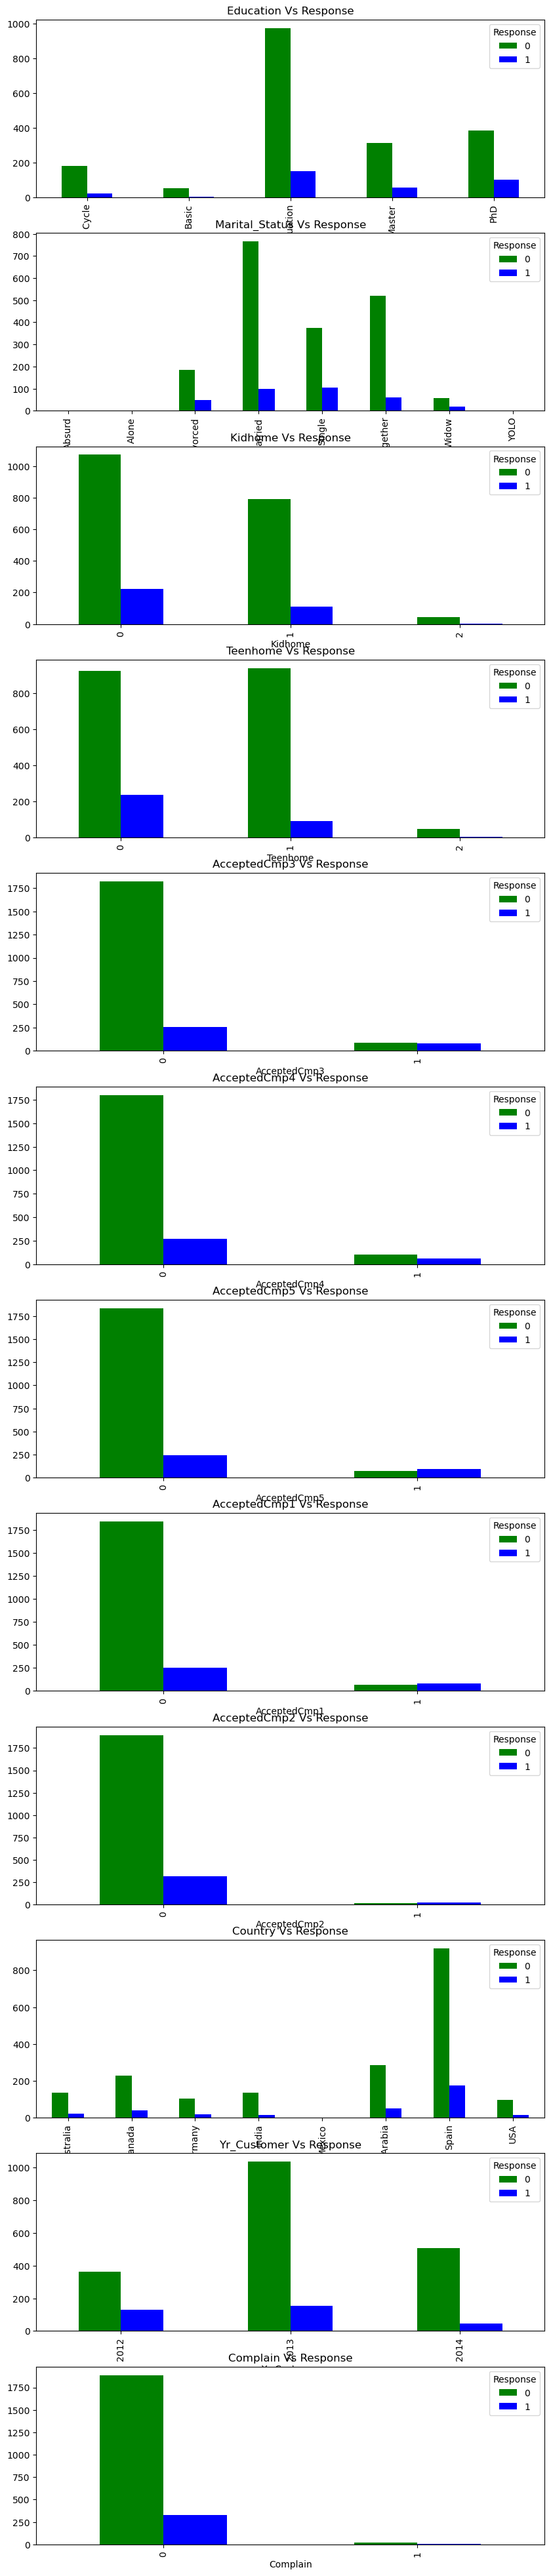

In [162]:
# Visual Inference using Grouped Bar charts
CategoricalColsList=['Education','Marital_Status','Kidhome','Teenhome','AcceptedCmp3','AcceptedCmp4',
                     'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Country', 'Yr_Customer', 'Complain']

import matplotlib.pyplot as plt
fig, PlotCanvas=plt.subplots(nrows=len(CategoricalColsList), ncols=1, figsize=(10,50))

# Creating Grouped bar plots for each categorical predictor against the Target Variable "Survived"
for CategoricalCol , i in zip(CategoricalColsList, range(len(CategoricalColsList))):
    CrossTabResult=pd.crosstab(index=MarketingData[CategoricalCol], columns=MarketingData['Response'])
    CrossTabResult.plot.bar(color=['green','blue'], ax=PlotCanvas[i], title=CategoricalCol+' Vs '+'Response')

### Grouped Bar charts Interpretation

### Statistical Feature Selection (Categorical Vs Categorical) using Chi-Square Test

Chi-Square test is conducted to check the correlation between two categorical variables

* Assumption(H0): The two columns are NOT related to each other
* Result of Chi-Sq Test: The Probability of H0 being True
* More information on ChiSq: https://www.mathsisfun.com/data/chi-square-test.html

In [163]:
# Writing a function to find the correlation of all categorical variables with the Target variable
def FunctionChisq(inpData, TargetVariable, CategoricalVariablesList):
    from scipy.stats import chi2_contingency
    
    # Creating an empty list of final selected predictors
    SelectedPredictors=[]

    for predictor in CategoricalVariablesList:
        CrossTabResult=pd.crosstab(index=inpData[TargetVariable], columns=inpData[predictor])
        ChiSqResult = chi2_contingency(CrossTabResult)
        
        # If the ChiSq P-Value is <0.05, that means we reject H0
        if (ChiSqResult[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', ChiSqResult[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', ChiSqResult[1])        
            
    return(SelectedPredictors)

In [164]:
CategoricalVariables=['Education','Marital_Status','Kidhome','Teenhome','AcceptedCmp3','AcceptedCmp4',
                     'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Country', 'Yr_Customer', 'Complain']

# Calling the function
FunctionChisq(inpData=MarketingData, 
              TargetVariable='Response',
              CategoricalVariablesList= CategoricalVariables)

Education is correlated with Response | P-Value: 0.00012226975294505314
Marital_Status is correlated with Response | P-Value: 2.106747054090692e-09
Kidhome is correlated with Response | P-Value: 0.0006634214493033535
Teenhome is correlated with Response | P-Value: 2.147696703661783e-13
AcceptedCmp3 is correlated with Response | P-Value: 9.364995605427315e-33
AcceptedCmp4 is correlated with Response | P-Value: 1.3953678043411643e-16
AcceptedCmp5 is correlated with Response | P-Value: 3.8280454367522022e-53
AcceptedCmp1 is correlated with Response | P-Value: 2.815498494500291e-43
AcceptedCmp2 is correlated with Response | P-Value: 8.878117846243345e-15
Country is NOT correlated with Response | P-Value: 0.07415066516768369
Yr_Customer is correlated with Response | P-Value: 4.481752339504147e-17
Complain is NOT correlated with Response | P-Value: 1.0


['Education',
 'Marital_Status',
 'Kidhome',
 'Teenhome',
 'AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'AcceptedCmp1',
 'AcceptedCmp2',
 'Yr_Customer']

<b>Final selected Categorical columns:</b>

'Education','Marital_Status','Kidhome','Teenhome','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2','Yr_Customer'

### Selecting final predictors for Machine Learning

In [165]:
SelectedColumns=['Income','Recency','MntWines', 'MntFruits', 'MntMeatProducts','MntFishProducts', 'MntSweetProducts', 
                 'MntGoldProds', 'NumWebPurchases','NumCatalogPurchases','total_spent','Education','Marital_Status','Kidhome','Teenhome',
                 'AcceptedCmp3','AcceptedCmp4','AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2','Yr_Customer']

#Selecting final columns
DataForML=MarketingData[SelectedColumns]
DataForML.head()

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumWebPurchases,NumCatalogPurchases,...,Education,Marital_Status,Kidhome,Teenhome,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Yr_Customer
0,84835.0,0,189,104,379,111,189,218,4,4,...,Graduation,Divorced,0,0,0,0,0,0,0,2014
1,57091.0,0,464,5,64,7,0,37,7,3,...,Graduation,Single,0,0,0,0,0,0,1,2014
2,67267.0,0,134,11,59,15,2,30,3,2,...,Graduation,Married,0,1,0,0,0,0,0,2014
3,32474.0,0,10,0,1,0,0,0,1,0,...,Graduation,Together,1,1,0,0,0,0,0,2014
4,21474.0,0,6,16,24,11,0,34,3,1,...,Graduation,Single,1,0,1,0,0,0,0,2014


In [166]:
# Saving this final data in serialized format for reference during deployment
DataForML.to_pickle('DataForML.pkl')

# Data Pre-processing for Machine Learning

#### 1. Converting each Ordinal Categorical columns to numeric
 Looking at unique values of ordinal column 'Education'

In [167]:
DataForML['Education'].unique()

array(['Graduation', 'PhD', '2n Cycle', 'Master', 'Basic'], dtype=object)

In [168]:
# Replacing the ordinal values for Education
DataForML['Education'].replace({'Basic':1,
                         '2n Cycle':2,
                         'Graduation':3,
                         'Master':4,
                         'PhD':5},inplace=True)

In [169]:
DataForML['Education'].unique()

array([3, 5, 2, 4, 1], dtype=int64)

#### 2. Converting Binary nominal Categorical columns to numeric using 1/0 mapping
No column required 1/0 mapping

#### 3. Converting the nominal variable to numeric using get_dummies()

In [170]:
# Treating all the nominal variables at once using dummy variables
DataForML_Numeric=pd.get_dummies(DataForML)

# Adding Target Variable to the data
DataForML_Numeric['Response']=MarketingData['Response']

# Printing sample rows
DataForML_Numeric.head()

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumWebPurchases,NumCatalogPurchases,...,Yr_Customer,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,Response
0,84835.0,0,189,104,379,111,189,218,4,4,...,2014,0,0,1,0,0,0,0,0,1
1,57091.0,0,464,5,64,7,0,37,7,3,...,2014,0,0,0,0,1,0,0,0,1
2,67267.0,0,134,11,59,15,2,30,3,2,...,2014,0,0,0,1,0,0,0,0,0
3,32474.0,0,10,0,1,0,0,0,1,0,...,2014,0,0,0,0,0,1,0,0,0
4,21474.0,0,6,16,24,11,0,34,3,1,...,2014,0,0,0,0,1,0,0,0,1


# Machine Learning: Splitting the data into Training and Testing sample

In [171]:
# Printing all the column names for our reference
DataForML_Numeric.columns

Index(['Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumWebPurchases', 'NumCatalogPurchases', 'total_spent', 'Education',
       'Kidhome', 'Teenhome', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Yr_Customer', 'Marital_Status_Absurd',
       'Marital_Status_Alone', 'Marital_Status_Divorced',
       'Marital_Status_Married', 'Marital_Status_Single',
       'Marital_Status_Together', 'Marital_Status_Widow',
       'Marital_Status_YOLO', 'Response'],
      dtype='object')

In [172]:
# Separate Target Variable and Predictor Variables
TargetVariable='Response'
Predictors=['Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumWebPurchases', 'NumCatalogPurchases', 'total_spent', 'Education',
       'Kidhome', 'Teenhome', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Yr_Customer', 'Marital_Status_Absurd',
       'Marital_Status_Alone', 'Marital_Status_Divorced',
       'Marital_Status_Married', 'Marital_Status_Single',
       'Marital_Status_Together', 'Marital_Status_Widow',
       'Marital_Status_YOLO']

X=DataForML_Numeric[Predictors].values
y=DataForML_Numeric[TargetVariable].values

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=369)

# Principal Component Analysis
#### Applying PCA

In [173]:
X.shape

(2240, 28)

In [174]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline

# Creating maximum components equal to the total number of columns to analyze all of them
pca = PCA(n_components=X.shape[1])

# fitting the data
pca_fit=pca.fit(X)

# calculating the principal components
reduced_X = pca_fit.transform(X)

#4 Columns present in X are now represented by 4 Principal components present in reduced_X
print(np.round(reduced_X[0:10],2))

[[ 3.281754e+04  6.126800e+02  7.918000e+01 -1.860700e+02  6.333000e+01
   4.670000e+01  8.210000e+00  9.850000e+01 -3.390000e+00 -2.150000e+00
   6.900000e-01 -8.100000e-01 -2.700000e-01  8.000000e-02  2.000000e-02
  -7.000000e-02  9.900000e-01 -1.500000e-01 -2.300000e-01  1.600000e-01
  -2.200000e-01  3.000000e-02  1.000000e-02 -0.000000e+00 -0.000000e+00
  -0.000000e+00  0.000000e+00 -0.000000e+00]
 [ 5.079860e+03 -1.111400e+02 -1.623300e+02  3.619000e+01  1.195000e+01
  -3.170000e+00 -4.495000e+01  2.132000e+01  2.160000e+00  7.600000e-01
  -9.200000e-01 -1.120000e+00 -4.700000e-01  9.100000e-01  4.800000e-01
  -5.000000e-01 -2.000000e-01 -2.100000e-01 -9.000000e-02 -1.000000e-02
  -3.000000e-02 -0.000000e+00  9.800000e-01 -0.000000e+00  0.000000e+00
   1.000000e-02 -0.000000e+00  0.000000e+00]
 [ 1.524705e+04  5.159300e+02 -1.604200e+02  2.849000e+01  8.910000e+00
  -1.340000e+00 -4.734000e+01  1.614000e+01 -7.300000e-01  1.000000e-02
  -7.100000e-01 -6.300000e-01  6.400000e-01 -4

In [175]:
#Cumulative Variance explained by each component
var_explained_cumulative=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
print(var_explained_cumulative)

[ 99.97 100.   100.01 100.01 100.01 100.01 100.01 100.01 100.01 100.01
 100.01 100.01 100.01 100.01 100.01 100.01 100.01 100.01 100.01 100.01
 100.01 100.01 100.01 100.01 100.01 100.01 100.01 100.01]


Text(0, 0.5, '% Variance explained')

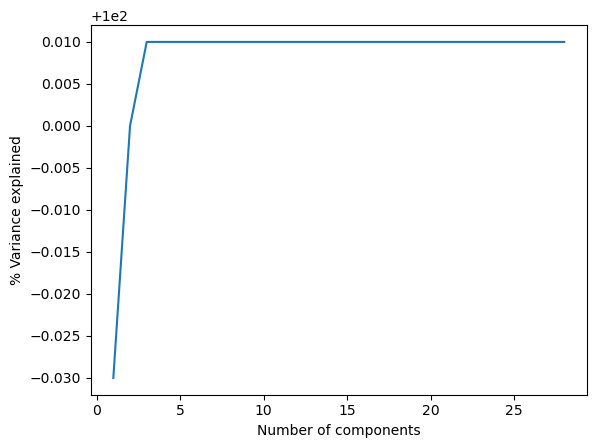

In [176]:
# By Looking at below graph we can see that 2 components are explaining maximum Variance in the dataset
# The elbow occurs at 2nd principal component
plt.plot( range(1,29), var_explained_cumulative)
plt.xlabel('Number of components')
plt.ylabel('% Variance explained')

In [177]:
# Creating final 2 components based on above curve
NumComponents=2
pca = PCA(n_components=NumComponents)

# fitting the data
pca_fit=pca.fit(X)

# calculating the principal components
reduced_X = pca_fit.transform(X)

#4 Columns present in X_train are now represented by 33 Principal components present in reduced_X_train
print(np.round(reduced_X[0:10],2))

[[ 32817.54    612.68]
 [  5079.86   -111.14]
 [ 15247.05    515.93]
 [-19544.06    131.25]
 [-30542.08    -60.56]
 [ 19679.19    171.13]
 [ 11560.99   -510.85]
 [ -7087.35    240.29]
 [ 13310.07    136.3 ]
 [ 13310.07    136.3 ]]


Based on the above chart we can see that saturation is happening around 2 principal components. They are explaining around 100% of the total data variance. Hence choosing 2 Principal components. With this, we were able to reduce the total number of columns significantly as compared to original 49 predictor columns.

In [178]:
# Equating reduced_X to X_train to let the other code run without changing everything
X=reduced_X
# Generating Predictor names
Predictors=pd.Series(['PC']*NumComponents).str.cat(pd.Series(range(1,NumComponents+1)).apply(str)).values
Predictors


array(['PC1', 'PC2'], dtype=object)

## Clustering (Unsupervised Machine Learning) for customer segmentation

### K-Means Clustering

In [179]:
# Taking out only the Predictor variables
# Printing some sample records
print(X[0:10])
X.shape

[[ 32817.53859889    612.67802094]
 [  5079.85885965   -111.13911957]
 [ 15247.04684242    515.93193098]
 [-19544.05663952    131.24781738]
 [-30542.07706141    -60.55666111]
 [ 19679.18757139    171.12689117]
 [ 11560.99466792   -510.84741838]
 [ -7087.34879266    240.29246691]
 [ 13310.07015292    136.30046377]
 [ 13310.07015292    136.30046377]]


(2240, 2)

### Finding the best number of clusters based on the inertia value

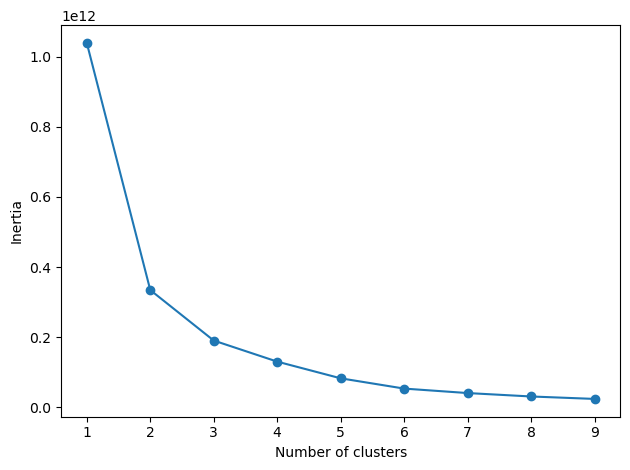

In [180]:
# Finding the best number of clusters based on the inertia value
%matplotlib inline
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
inertiaValue = []
for i in range(1,10):
    km = KMeans(n_clusters=i, 
                init='random',
                n_init=10, 
                max_iter=300,
                tol=1e-04,
                random_state=0)
    
    km.fit(X)
    inertiaValue.append(km.inertia_)
    
plt.plot(range(1,10), inertiaValue, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.tight_layout()
#plt.savefig('elbow.png', dpi=300)
plt.show()

### Using above graph deciding optimal number of clusters

In [181]:
# Defining the K-Means object for best number of clusters. n=5 in this case
km = KMeans(n_clusters=5, 
            init='random', 
            n_init=10, 
            max_iter=300,
            tol=1e-04,
            random_state=3)

In [182]:
# Running the clustering algorithm on the data set
predictedCluster = km.fit_predict(X)
print(predictedCluster)
print('Inertia:', km.inertia_)

[0 3 3 ... 2 3 0]
Inertia: 82924618728.7127


In [183]:
DataForML_Cluster=DataForML_Numeric.copy()

In [184]:
DataForML_Cluster['PredictedClusterID']=predictedCluster
DataForML_Cluster.tail(10)

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumWebPurchases,NumCatalogPurchases,...,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,Response,PredictedClusterID
2230,20130.0,99,0,6,3,7,6,12,1,0,...,0,0,0,1,0,0,0,0,0,1
2231,42429.0,99,55,0,6,2,0,4,1,1,...,0,0,0,0,0,0,1,0,0,2
2232,42429.0,99,55,0,6,2,0,4,1,1,...,0,0,0,0,0,0,1,0,0,2
2233,36640.0,99,15,6,8,7,4,25,2,1,...,0,0,1,0,0,0,0,0,0,2
2234,78901.0,99,321,11,309,33,26,34,9,3,...,0,0,1,0,0,0,0,0,0,0
2235,66476.0,99,372,18,126,47,48,78,5,2,...,0,0,1,0,0,0,0,0,0,3
2236,31056.0,99,5,10,13,3,8,16,1,0,...,0,0,0,1,0,0,0,0,0,1
2237,46310.0,99,185,2,88,15,5,14,6,1,...,0,0,1,0,0,0,0,0,0,2
2238,65819.0,99,267,38,701,149,165,63,5,4,...,0,0,0,1,0,0,0,0,0,3
2239,94871.0,99,169,24,553,188,0,144,8,5,...,0,0,0,1,0,0,0,0,1,0


### Visualizing the clusters using any two columns in data

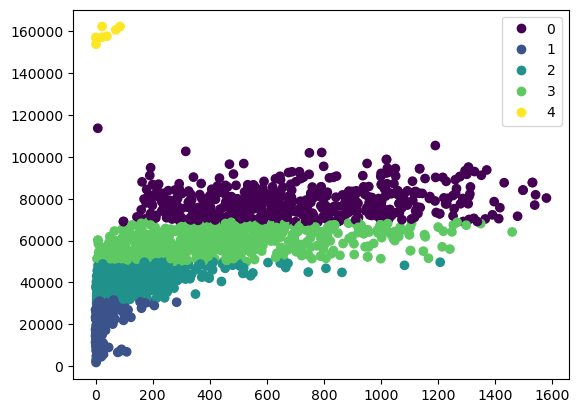

In [185]:
# create scatter plot to visualize the data
%matplotlib inline
scatter=plt.scatter(x=DataForML_Cluster['total_spent'], y=DataForML_Cluster['Income'], c=DataForML_Cluster['PredictedClusterID'])
#plt.legend_elements()
plt.legend(*scatter.legend_elements())

### Hierarchical Clustering

    Income  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  84835.0        0       189        104              379              111   
1  57091.0        0       464          5               64                7   
2  67267.0        0       134         11               59               15   
3  32474.0        0        10          0                1                0   
4  21474.0        0         6         16               24               11   

   MntSweetProducts  MntGoldProds  NumWebPurchases  NumCatalogPurchases  ...  \
0               189           218                4                    4  ...   
1                 0            37                7                    3  ...   
2                 2            30                3                    2  ...   
3                 0             0                1                    0  ...   
4                 0            34                3                    1  ...   

   Marital_Status_Absurd  Marital_Status_Alone  Ma

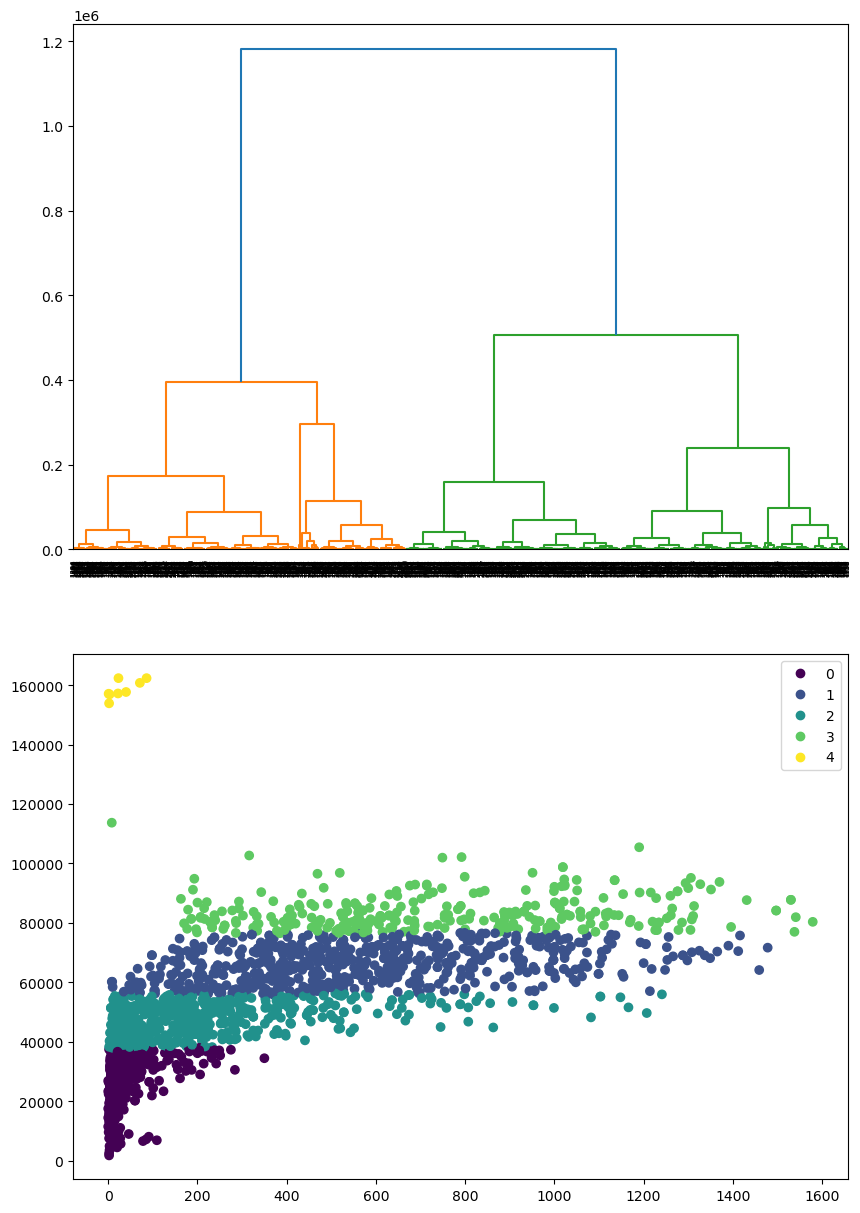

In [186]:
# Hierarchical Clustering
%matplotlib inline
import matplotlib.pyplot as plt
fig, subPlots=plt.subplots(nrows=2, ncols=1, figsize=(10,15))

# create dendrogram to find best number of clusters
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'), ax=subPlots[0])
##################################################################
# Creating 4 Clusters Based on the above dendogram visually
# Bottom-Up hierarchical clustering
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'ward')

# Generating cluster id for each row using agglomerative algorithm
DataForML_Cluster['PredictedClusterID']=hc.fit_predict(X)
print(DataForML_Cluster.head())
 
# Plotting the predicted clusters
scatter=plt.scatter(x=DataForML_Cluster['total_spent'], y=DataForML_Cluster['Income'], c=DataForML_Cluster['PredictedClusterID'])
plt.legend(*scatter.legend_elements())
# Use of Linkage
# "ward" minimizes the variance of the clusters being merged.
# "average" uses the average of the distances of each observation of the two sets.
# "complete" or maximum linkage uses the maximum distances between all observations of the two sets.

### Finding Best number of clusters for Hierarchical Clustering using Silhouette Coefficient
The best value of Silhouette Coefficient is 1 and the worst value is -1. Values near 0 indicate overlapping clusters. Negative values generally indicate that a sample has been assigned to the wrong cluster

In [187]:
## Finding Optimal Number of clusters using silhouette score
import numpy as np
import pandas as pd
from sklearn.metrics import silhouette_score

# Defining the list of clusters to try
n_clusters_list=np.arange(start=2, stop=10, step=1)

# Creating empty data frame to store the silhouette scores for each trials
silhouette_scores_data=pd.DataFrame()

for n_clusters_trial in n_clusters_list:
   
        
    # Generating Hierarchical clusters
    from sklearn.cluster import AgglomerativeClustering
    hc = AgglomerativeClustering(n_clusters=n_clusters_trial, affinity = 'euclidean', linkage = 'ward')
        
    if(len(np.unique(hc.fit_predict(X)))>1):
        sil_score=silhouette_score(X, hc.fit_predict(X))
    else:
        continue
    
    # Appending the result of each iteration
    silhouette_scores_data=silhouette_scores_data.append(pd.DataFrame(data=[[sil_score,n_clusters_trial]], 
                                                                          columns=["score", "Clusters"]))

In [188]:
silhouette_scores_data

,score,Clusters
0,0.593465,2
0,0.509555,3
0,0.516316,4
0,0.521415,5
0,0.507055,6
0,0.479371,7
0,0.484450,8
0,0.495489,9


In [189]:
# Finding out the best nmber of clusters with highest Score
silhouette_scores_data.sort_values(by='score', ascending=False).head(5)

,score,Clusters
0,0.593465,2
0,0.521415,5
0,0.516316,4
0,0.509555,3
0,0.507055,6


To keep it generalize we are keeping 5 clusters.

In [190]:
print(DataForML_Cluster['PredictedClusterID'].unique())
print(DataForML_Cluster.head())

[3 1 0 2 4]
    Income  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  84835.0        0       189        104              379              111   
1  57091.0        0       464          5               64                7   
2  67267.0        0       134         11               59               15   
3  32474.0        0        10          0                1                0   
4  21474.0        0         6         16               24               11   

   MntSweetProducts  MntGoldProds  NumWebPurchases  NumCatalogPurchases  ...  \
0               189           218                4                    4  ...   
1                 0            37                7                    3  ...   
2                 2            30                3                    2  ...   
3                 0             0                1                    0  ...   
4                 0            34                3                    1  ...   

   Marital_Status_Absurd  Marital_Stat

### Grouping according to Clustering
* Group 0: Low income, low spending.
* Group 1: Average income, high spending
* Group 2: Average income, low spending
* Group 3: High income, high spending
* Group 4: High income, low spending

In [191]:
DataForML_Cluster.columns


Index(['Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumWebPurchases', 'NumCatalogPurchases', 'total_spent', 'Education',
       'Kidhome', 'Teenhome', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Yr_Customer', 'Marital_Status_Absurd',
       'Marital_Status_Alone', 'Marital_Status_Divorced',
       'Marital_Status_Married', 'Marital_Status_Single',
       'Marital_Status_Together', 'Marital_Status_Widow',
       'Marital_Status_YOLO', 'Response', 'PredictedClusterID'],
      dtype='object')

In [192]:
# Separate Target Variable and Predictor Variables
TargetVariable='Response'
Predictors=['Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumWebPurchases', 'NumCatalogPurchases', 'total_spent', 'Education',
       'Kidhome', 'Teenhome', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Yr_Customer', 'Marital_Status_Absurd',
       'Marital_Status_Alone', 'Marital_Status_Divorced',
       'Marital_Status_Married', 'Marital_Status_Single',
       'Marital_Status_Together', 'Marital_Status_Widow',
       'Marital_Status_YOLO','PredictedClusterID']

X=DataForML_Cluster[Predictors].values
y=DataForML_Cluster[TargetVariable].values

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=369)

# Standardization/Normalization of data

In [193]:
### Standardization of data ###
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Choose either standardization or Normalization
# On this data Min Max Normalization produced better results
PredictorScaler=MinMaxScaler()

# Storing the fit object for later reference
PredictorScalerFit=PredictorScaler.fit(X)

# Generating the standardized values of X
X=PredictorScalerFit.transform(X)

# Split the data into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=369)

In [194]:
# Sanity check for the sampled data
print(X.shape)
print(y.shape)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(2240, 29)
(2240,)
(1568, 29)
(1568,)
(672, 29)
(672,)


# Logistic Regression

     Income   Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  0.255429  0.151515  0.047555   0.000000         0.007536         0.011583   
1  0.316188  0.686869  0.189551   0.562814         0.087536         0.196911   
2  0.130108  0.474747  0.001340   0.115578         0.006377         0.030888   
3  0.411914  0.636364  0.354320   0.000000         0.206377         0.243243   
4  0.564901  0.717172  0.655727   0.221106         0.542029         0.111969   

   MntSweetProducts  MntGoldProds  NumWebPurchases  NumCatalogPurchases  ...  \
0          0.003802      0.000000         0.037037             0.035714  ...   
1          0.273764      0.345304         0.259259             0.071429  ...   
2          0.022814      0.127072         0.074074             0.035714  ...   
3          0.106464      0.000000         0.222222             0.250000  ...   
4          0.095057      0.060773         0.259259             0.178571  ...   

   Marital_Status_Alone  Marital_Statu

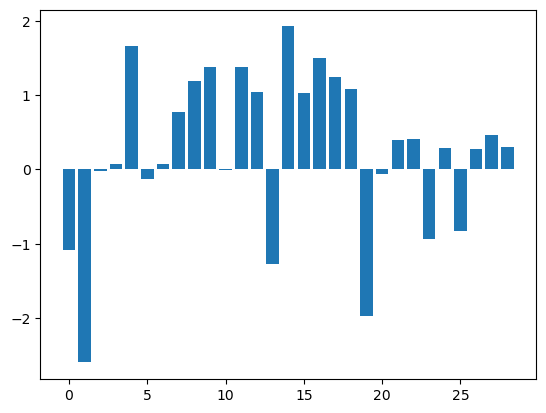

In [195]:
import time
T1=time.time()

# Logistic Regression
from sklearn.linear_model import LogisticRegression
# choose parameter Penalty='l1' or C=1
# choose different values for solver 'newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'
clf = LogisticRegression(C=1,penalty='l2', solver='newton-cg')
#clf = LogisticRegression(C=1,penalty='l2', solver='liblinear')

# Printing all the parameters of logistic regression
# print(clf)

# Creating the model on Training Data
LOG=clf.fit(X_train,y_train)

# Generating predictions on testing data
prediction=LOG.predict(X_test)
# Printing sample values of prediction in Testing data
TestingData=pd.DataFrame(data=X_test, columns=Predictors)
TestingData['Response']=y_test
TestingData['Predicted_Response']=prediction
print(TestingData.head())


# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(prediction, y_test))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(LOG, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

T2=time.time()
print("Time taken:", T2-T1)

# logistic regression for feature importance
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
# get importance
importance = LOG.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()



# Decision Trees

DecisionTreeClassifier(criterion='entropy', max_depth=1)
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       563
           1       0.64      0.33      0.44       109

    accuracy                           0.86       672
   macro avg       0.76      0.65      0.68       672
weighted avg       0.84      0.86      0.84       672

[[543  20]
 [ 73  36]]
Accuracy of the model on Testing Sample Data: 0.84

Accuracy values for 10-fold Cross Validation:
 [0.13462653 0.84114479 0.82762391 0.83427478 0.88287792 0.80968684
 0.82214197 0.87879407 0.84970465 0.84000818]

Final Average Accuracy of the model: 0.77
Time taken: 0.08664584159851074


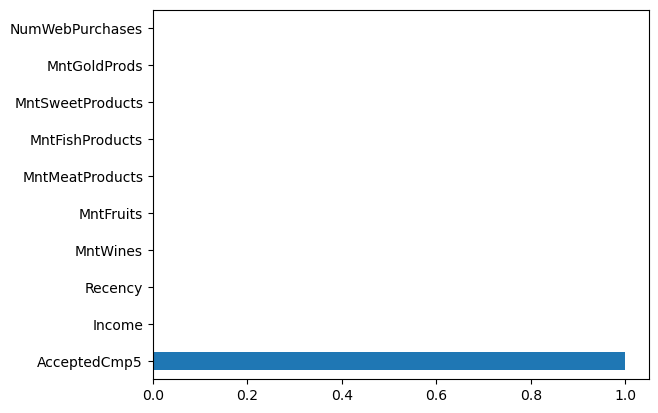

In [196]:
import time
T1=time.time()
#Decision Trees
from sklearn import tree
#choose from different tunable hyper parameters
clf = tree.DecisionTreeClassifier(max_depth=1,criterion='entropy')

# Printing all the parameters of Decision Trees
print(clf)

# Creating the model on Training Data
DTree=clf.fit(X_train,y_train)
prediction=DTree.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(DTree.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(DTree, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

T2=time.time()
print("Time taken:", T2-T1)

# Random Forest

RandomForestClassifier(max_depth=2)
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       563
           1       0.88      0.06      0.12       109

    accuracy                           0.85       672
   macro avg       0.86      0.53      0.52       672
weighted avg       0.85      0.85      0.79       672

[[562   1]
 [102   7]]
Accuracy of the model on Testing Sample Data: 0.79

Accuracy values for 10-fold Cross Validation:
 [0.79468684 0.78664856 0.77855418 0.78664856 0.78487522 0.79543702
 0.78487522 0.79543702 0.81225458 0.8055128 ]

Final Average Accuracy of the model: 0.79
Time taken: 1.7281262874603271


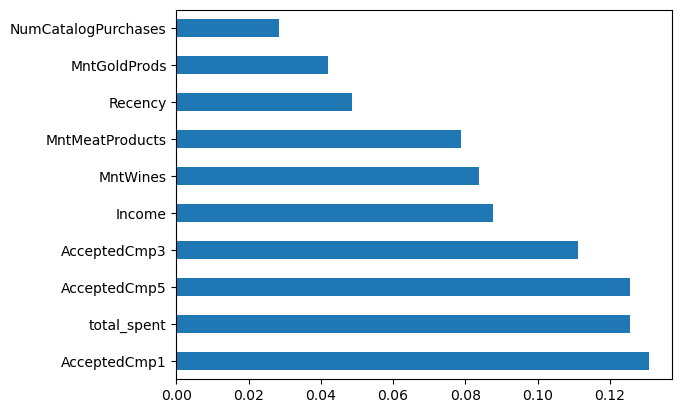

In [197]:
import time
T1=time.time()
# Random Forest (Bagging of multiple Decision Trees)
from sklearn.ensemble import RandomForestClassifier
# Choose different hyperparameter values of max_depth, n_estimators and criterion to tune the model
clf = RandomForestClassifier(max_depth=2, n_estimators=100,criterion='gini')

# Printing all the parameters of Random Forest
print(clf)

# Creating the model on Training Data
RF=clf.fit(X_train,y_train)
prediction=RF.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(RF, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(RF.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

T2=time.time()
print("Time taken:", T2-T1)

# AdaBoost

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2),
                   learning_rate=0.01, n_estimators=100)
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       563
           1       0.73      0.17      0.28       109

    accuracy                           0.86       672
   macro avg       0.80      0.58      0.60       672
weighted avg       0.84      0.86      0.82       672

[[556   7]
 [ 90  19]]
Accuracy of the model on Testing Sample Data: 0.82

Accuracy values for 10-fold Cross Validation:
 [0.12644009 0.82062919 0.71070465 0.80609313 0.83321566 0.82366459
 0.8151439  0.78487522 0.80282016 0.80938933]

Final Average Accuracy of the model: 0.73
Time taken: 5.037877798080444


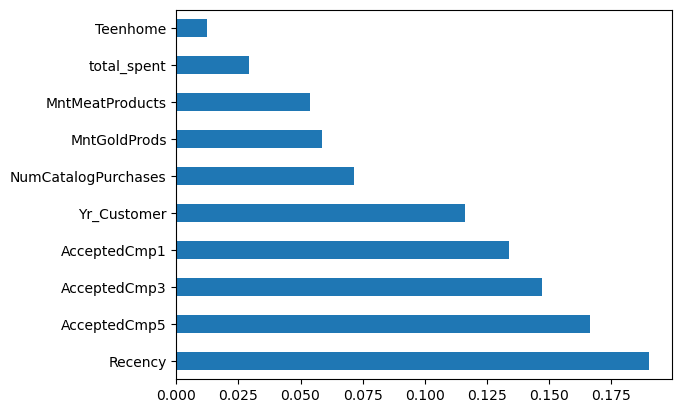

In [198]:
import time
T1=time.time()
# Adaboost 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Choosing Decision Tree with 1 level as the weak learner
DTC=DecisionTreeClassifier(max_depth=2)
clf = AdaBoostClassifier(n_estimators=100, base_estimator=DTC ,learning_rate=0.01)

# Printing all the parameters of Adaboost
print(clf)

# Creating the model on Training Data
AB=clf.fit(X_train,y_train)
prediction=AB.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(AB, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(AB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')

T2=time.time()
print("Time taken:", T2-T1)

# XGBoost

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, gamma=None,
              gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=1,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=None,
              reg_alpha=None, reg_lambda=None, ...)
              precision    recall  f1-score   support

           0       0.87      0.99      0.92       563
           1       0.80      0.22      0.35       109

    accuracy                           0.86       672
   macro avg       0.83      0.60      0.

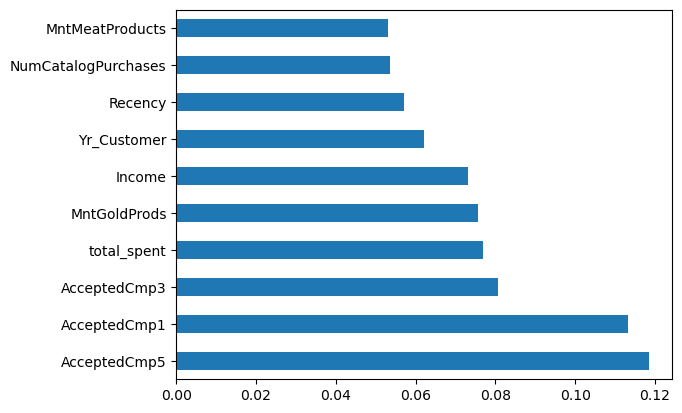

In [199]:
import time
T1=time.time()
# Xtreme Gradient Boosting (XGBoost)
from xgboost import XGBClassifier
clf=XGBClassifier(max_depth=1, learning_rate=0.1, n_estimators=100, objective='binary:logistic', booster='gbtree')
#clf=XGBClassifier(max_depth=2, learning_rate=0.1, n_estimators=100, objective='multi:softmax', booster='gbtree')

# Printing all the parameters of XGBoost
print(clf)

# Creating the model on Training Data
XGB=clf.fit(X_train,y_train)
prediction=XGB.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(XGB, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

# Plotting the feature importance for Top 10 most important columns
%matplotlib inline
feature_importances = pd.Series(XGB.feature_importances_, index=Predictors)
feature_importances.nlargest(10).plot(kind='barh')
T2=time.time()
print("Time taken:", T2-T1)

# KNN

KNeighborsClassifier(n_neighbors=1)
              precision    recall  f1-score   support

           0       0.89      0.91      0.90       563
           1       0.48      0.41      0.45       109

    accuracy                           0.83       672
   macro avg       0.69      0.66      0.67       672
weighted avg       0.82      0.83      0.83       672

[[515  48]
 [ 64  45]]
Accuracy of the model on Testing Sample Data: 0.83

Accuracy values for 10-fold Cross Validation:
 [0.70421798 0.76173115 0.7235769  0.80165897 0.86768852 0.823876
 0.81713098 0.84275206 0.8303117  0.84691178]

Final Average Accuracy of the model: 0.8
Time taken: 0.22068405151367188
Feature: 0, Score: 0.00268
Feature: 1, Score: 0.03571
Feature: 2, Score: 0.00357
Feature: 3, Score: 0.00750
Feature: 4, Score: 0.00071
Feature: 5, Score: 0.00563
Feature: 6, Score: 0.00286
Feature: 7, Score: 0.00455
Feature: 8, Score: 0.00295
Feature: 9, Score: 0.00089
Feature: 10, Score: 0.00277
Feature: 11, Score: 0.02446
Feat

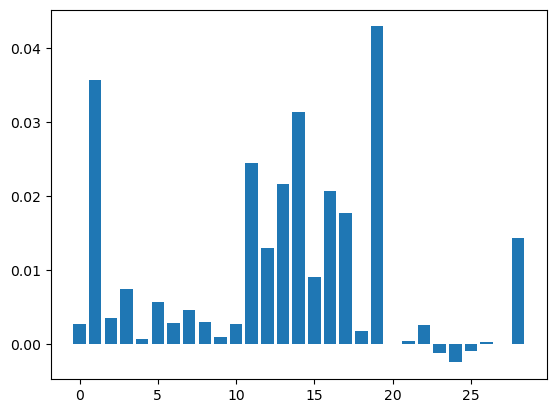

In [200]:
import time
T1=time.time()
# K-Nearest Neighbor(KNN)
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=1)

# Printing all the parameters of KNN
print(clf)

# Creating the model on Training Data
KNN=clf.fit(X_train,y_train)
prediction=KNN.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(KNN, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))


# Plotting the feature importance for Top 10 most important columns
# There is no built-in method to get feature importance in KNN
T2=time.time()
print("Time taken:", T2-T1)

# permutation feature importance with knn for classification
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import permutation_importance
from matplotlib import pyplot

# perform permutation importance
results = permutation_importance(KNN, X, y, scoring='accuracy')
# get importance
importance = results.importances_mean
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

# SVM

In [201]:
import time
T1=time.time()
# Support Vector Machines(SVM)
from sklearn import svm
clf = svm.SVC(C=10, kernel='rbf', gamma=0.01)

# Printing all the parameters of SVM
print(clf)

# Creating the model on Training Data
SVM=clf.fit(X_train,y_train)
prediction=SVM.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(SVM, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

# Plotting the feature importance for Top 10 most important columns
# The built in attribute SVM.coef_ works only for linear kernel

%matplotlib inline
#feature_importances = pd.Series(SVM.coef_[0], index=Predictors)
#feature_importances.nlargest(10).plot(kind='barh')
T2=time.time()
print("Time taken:", T2-T1)

SVC(C=10, gamma=0.01)
              precision    recall  f1-score   support

           0       0.88      0.99      0.93       563
           1       0.79      0.28      0.42       109

    accuracy                           0.87       672
   macro avg       0.84      0.64      0.67       672
weighted avg       0.86      0.87      0.85       672

[[555   8]
 [ 78  31]]
Accuracy of the model on Testing Sample Data: 0.85

Accuracy values for 10-fold Cross Validation:
 [0.82362388 0.86941205 0.82689039 0.85896501 0.9000433  0.84715347
 0.85779403 0.89352539 0.85065061 0.82852477]

Final Average Accuracy of the model: 0.86
Time taken: 0.9929788112640381


# Naive Bayes

In [202]:
import time
T1=time.time()
# Naive Bays
from sklearn.naive_bayes import GaussianNB, MultinomialNB

# GaussianNB is used in Binomial Classification
# MultinomialNB is used in multi-class classification
clf = GaussianNB()
#clf = MultinomialNB()

# Printing all the parameters of Naive Bayes
print(clf)

NB=clf.fit(X_train,y_train)
prediction=NB.predict(X_test)

# Measuring accuracy on Testing Data
from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))

# Printing the Overall Accuracy of the model
F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

# Importing cross validation function from sklearn
from sklearn.model_selection import cross_val_score

# Running 10-Fold Cross validation on a given algorithm
# Passing full data X and y because the K-fold will split the data and automatically choose train/test
Accuracy_Values=cross_val_score(NB, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))
T2=time.time()
print("Time taken:", T2-T1)

GaussianNB()
              precision    recall  f1-score   support

           0       0.91      0.87      0.89       563
           1       0.46      0.55      0.50       109

    accuracy                           0.82       672
   macro avg       0.68      0.71      0.70       672
weighted avg       0.84      0.82      0.83       672

[[492  71]
 [ 49  60]]
Accuracy of the model on Testing Sample Data: 0.83

Accuracy values for 10-fold Cross Validation:
 [0.84821429 0.82011441 0.78404445 0.82723556 0.87654176 0.68717406
 0.82142857 0.76202408 0.82879998 0.86046863]

Final Average Accuracy of the model: 0.81
Time taken: 0.07353734970092773


#### Based on the above trials we select that algorithm which produces the best average accuracy. In this case, multiple algorithms have produced similar kind of average accuracy. Hence, we can choose any one of them.

I am choosing <b>Logistic Regression</b> as the final model since it is very fast on this data.